Data of the top 1000 movies scraped from the IMDB website. The data is arranged by rating.

Research Questions

    How do genre and director influence a film's critical and audience reception?
    – What are the differences in average IMDb rating and Metascore across genres and directors?

    What are the trends in film ratings, critical scores, and box office gross over the decades?
    – How have these metrics evolved from the 1950s to the present? Are there identifiable periods of higher or lower critical or commercial success?

    What is the relationship between critical reception (Metascore), audience ratings (IMDb rating), and box office performance?
    – Do films with higher critical and audience ratings tend to earn higher gross revenue? Are there exceptions to this trend?

In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-top-1000-movies/imdb_clean.csv
/kaggle/input/imdb-top-1000-movies/imdb_raw.csv


# Import the dataset
This heading signals the next step in the workflow: loading the dataset into a pandas DataFrame for analysis.

In [51]:
imdb = pd.read_csv("/kaggle/input/imdb-top-1000-movies/imdb_clean.csv")

# See the result
imdb

,Unnamed: 0,title,director,release_year,runtime,genre,rating,metascore,gross(M)
0,0,The Shawshank Redemption,Frank Darabont,1994,142,Drama,9.3,82,28.34
1,1,The Godfather,Francis Ford Coppola,1972,175,Crime,9.2,100,134.97
2,1,The Godfather,Francis Ford Coppola,1972,175,Drama,9.2,100,134.97
3,2,The Dark Knight,Christopher Nolan,2008,152,Action,9.0,84,534.86
4,2,The Dark Knight,Christopher Nolan,2008,152,Crime,9.0,84,534.86
...,...,...,...,...,...,...,...,...,...
2527,998,The Invisible Man,James Whale,1933,71,Horror,7.6,87,0.00
2528,998,The Invisible Man,James Whale,1933,71,Sci-Fi,7.6,87,0.00
2529,999,Cell 211,Daniel Monzón,2009,113,Action,7.6,0,0.00
2530,999,Cell 211,Daniel Monzón,2009,113,Crime,7.6,0,0.00


This command provides a summary of the dataset, including column names, data types, and the number of non-null values per column. It's useful for understanding the structure of the data.

In [52]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2532 entries, 0 to 2531
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2532 non-null   int64  
 1   title         2532 non-null   object 
 2   director      2532 non-null   object 
 3   release_year  2532 non-null   int64  
 4   runtime       2532 non-null   int64  
 5   genre         2532 non-null   object 
 6   rating        2532 non-null   float64
 7   metascore     2532 non-null   int64  
 8   gross(M)      2532 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 178.2+ KB


Remove unneeded column.

In [53]:
imdb = imdb.drop(imdb.columns[0], axis=1)
imdb

,title,director,release_year,runtime,genre,rating,metascore,gross(M)
0,The Shawshank Redemption,Frank Darabont,1994,142,Drama,9.3,82,28.34
1,The Godfather,Francis Ford Coppola,1972,175,Crime,9.2,100,134.97
2,The Godfather,Francis Ford Coppola,1972,175,Drama,9.2,100,134.97
3,The Dark Knight,Christopher Nolan,2008,152,Action,9.0,84,534.86
4,The Dark Knight,Christopher Nolan,2008,152,Crime,9.0,84,534.86
...,...,...,...,...,...,...,...,...
2527,The Invisible Man,James Whale,1933,71,Horror,7.6,87,0.00
2528,The Invisible Man,James Whale,1933,71,Sci-Fi,7.6,87,0.00
2529,Cell 211,Daniel Monzón,2009,113,Action,7.6,0,0.00
2530,Cell 211,Daniel Monzón,2009,113,Crime,7.6,0,0.00


In [54]:
# Save to new CSV file
imdb.to_csv('imdb_clean_no_index.csv', index=False)

# EDA: Exploratory data analysis

## The most common genre

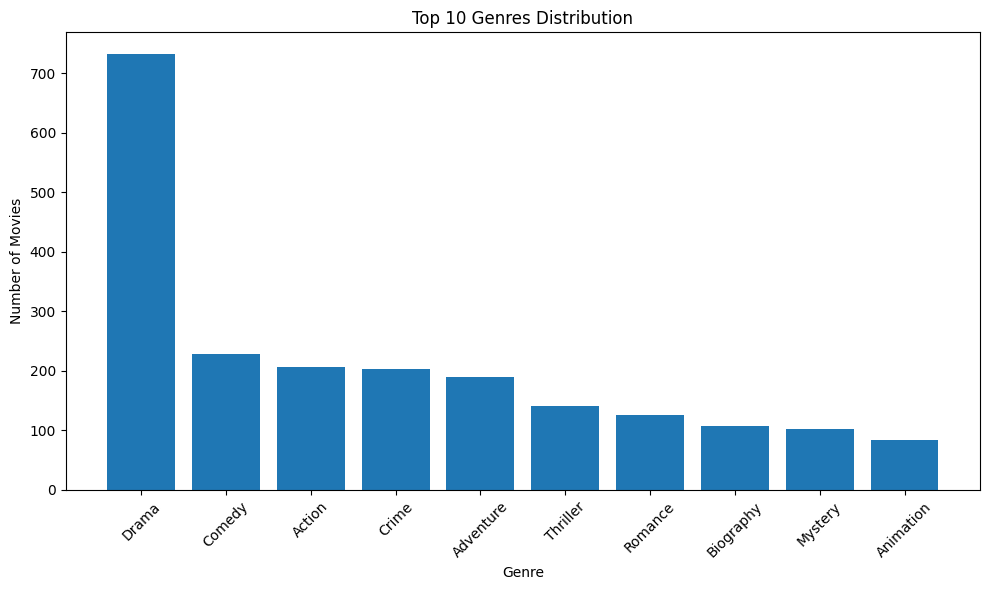

In [55]:
# Count the genres in the column
genres = imdb['genre'].str.split(',', expand=True).stack().str.strip()
genre_counts = genres.value_counts()

# Show only the 10 most common genres
top_genres = genre_counts.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_genres.index, top_genres.values)
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Top 10 Genres Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The most common genre is Drama.

## The year with the most movies rated 7.5 or higher

release_year
2004    83
2014    82
2016    73
2009    70
2001    68
2013    68
2019    67
2006    66
2007    65
2015    61
Name: count, dtype: int64


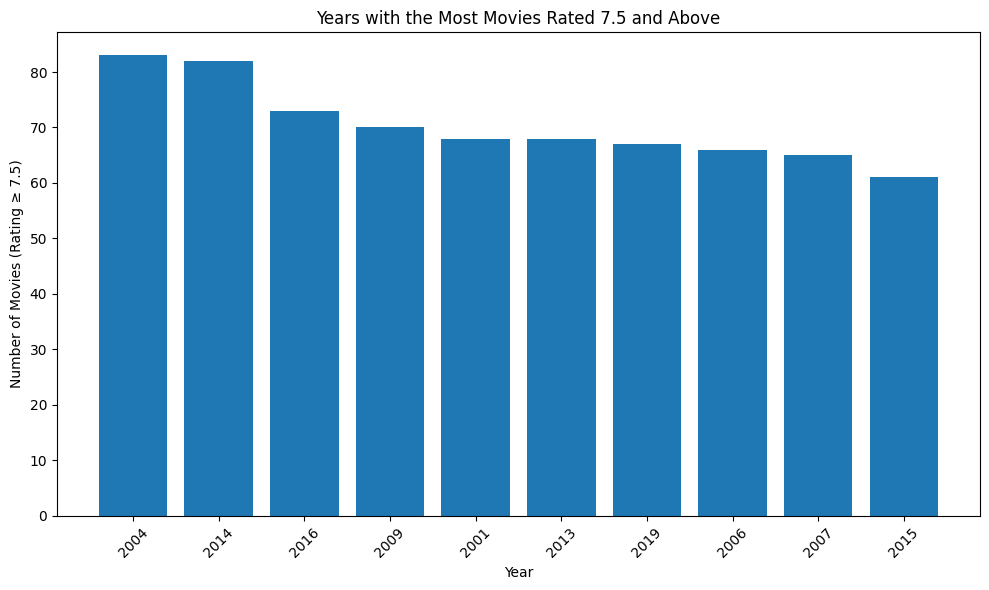

In [56]:
# Filter movies with rating 7.5 or higher
high_rated = imdb[imdb['rating'] >= 7.5]

# Count how many movies per year
year_counts = high_rated['release_year'].value_counts().sort_index()

# Get the top 10 years with the most high-rated movies
top_years = year_counts.sort_values(ascending=False).head(10)

# Print the years and the number of movies
print(top_years)

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_years.index.astype(str), top_years.values)
plt.xlabel('Year')
plt.ylabel('Number of Movies (Rating ≥ 7.5)')
plt.title('Years with the Most Movies Rated 7.5 and Above')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In 2004, there were the most movies rated 7.5 or higher.

## The most popular genre each year

In [57]:
# Group by year and genre, and count number of movies per (year, genre)
genre_counts = imdb.groupby(['release_year', 'genre']).size().reset_index(name='count')

# For each year, find the genre with the highest count
most_popular_genre_per_year = genre_counts.sort_values(['release_year', 'count'], ascending=[True, False]).groupby('release_year').first().reset_index()

# Print the result
print(most_popular_genre_per_year)

     release_year    genre  count
0            1920   Horror      1
1            1921   Comedy      1
2            1922  Fantasy      1
3            1924   Action      1
4            1925    Drama      2
..            ...      ...    ...
97           2019    Drama     22
98           2020    Drama      6
99           2021    Drama      7
100          2022    Drama     13
101          2023   Action      3

[102 rows x 3 columns]


## The 10 highest-grossing films

In [58]:
# Keep only the first occurrence of each movie title (or use title+release_year for better accuracy)
imdb_unique = imdb.drop_duplicates(subset=['title', 'release_year'])

# Sort by gross descending and take the top 10
top10_grossing_unique = imdb_unique.sort_values('gross(M)', ascending=False).head(10)

print(top10_grossing_unique[['title', 'gross(M)', 'release_year']])

                                           title  gross(M)  release_year
1589  Star Wars: Episode VII - The Force Awakens    936.66          2015
154                            Avengers: Endgame    858.37          2019
358                      Spider-Man: No Way Home    804.75          2021
1179                                      Avatar    760.51          2009
230                            Top Gun: Maverick    718.73          2022
171                       Avengers: Infinity War    678.82          2018
2328                    Avatar: The Way of Water    659.68          2022
1174                                     Titanic    659.33          1997
876                                 The Avengers    623.28          2012
3                                The Dark Knight    534.86          2008


## The year with the most films grossing over $100 million

In [59]:
# Filter for movies with gross over 100 million
profitable = imdb_unique[imdb_unique['gross(M)'] > 100]

# Count how many such movies per year
movies_per_year = profitable['release_year'].value_counts().sort_index()

# Find the year(s) with the highest count
max_count = movies_per_year.max()
most_profitable_years = movies_per_year[movies_per_year == max_count]

print("Year(s) with the most movies grossing over $100M:")
print(most_profitable_years)

Year(s) with the most movies grossing over $100M:
release_year
2014    12
Name: count, dtype: int64


## The highest-grossing films, with a rating of 7.5 or higher

In [60]:
# Drop duplicates by title and release_year
imdb_unique = imdb.drop_duplicates(subset=['title', 'release_year'])

# Filter for movies with rating >= 7.5
imdb_high_rating = imdb_unique[imdb_unique['rating'] >= 7.5]

# Sort by gross(M) descending and take the top 10
top10_profitable_high_rating = imdb_high_rating.sort_values('gross(M)', ascending=False).head(10)

# Display the results
print(top10_profitable_high_rating[['title', 'release_year', 'gross(M)', 'rating']])

                                           title  release_year  gross(M)  \
1589  Star Wars: Episode VII - The Force Awakens          2015    936.66   
154                            Avengers: Endgame          2019    858.37   
358                      Spider-Man: No Way Home          2021    804.75   
1179                                      Avatar          2009    760.51   
230                            Top Gun: Maverick          2022    718.73   
171                       Avengers: Infinity War          2018    678.82   
2328                    Avatar: The Way of Water          2022    659.68   
1174                                     Titanic          1997    659.33   
876                                 The Avengers          2012    623.28   
3                                The Dark Knight          2008    534.86   

      rating  
1589     7.8  
154      8.4  
358      8.2  
1179     7.9  
230      8.3  
171      8.4  
2328     7.6  
1174     7.9  
876      8.0  
3        9.0 

## Correlation between ranking and profit

Correlation between rating and gross(M): 0.08


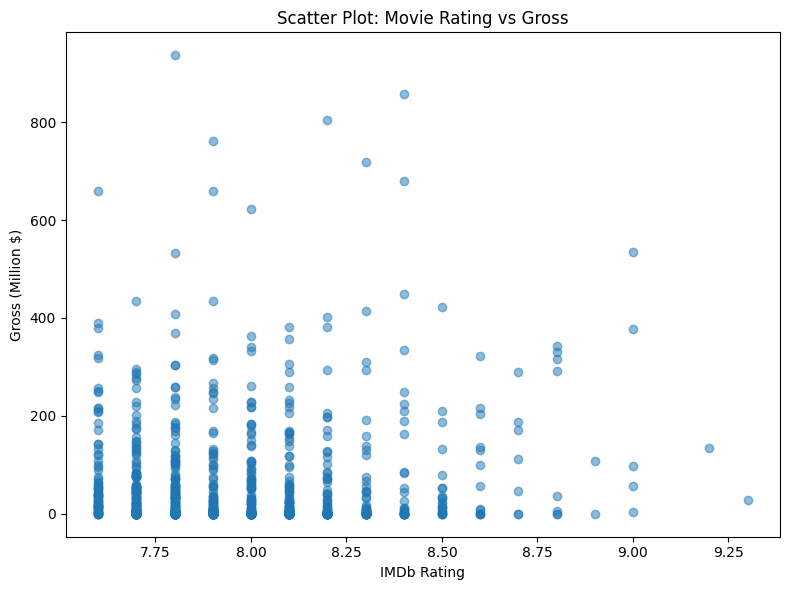

In [61]:
# Filter only movies with non-null values for rating and gross
imdb_valid = imdb_unique[imdb_unique['rating'].notnull() & imdb_unique['gross(M)'].notnull()]

# Calculate the correlation coefficient
correlation = imdb_valid['rating'].corr(imdb_valid['gross(M)'])
print(f"Correlation between rating and gross(M): {correlation:.2f}")

# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(imdb_valid['rating'], imdb_valid['gross(M)'], alpha=0.5)
plt.xlabel('IMDb Rating')
plt.ylabel('Gross (Million $)')
plt.title('Scatter Plot: Movie Rating vs Gross')
plt.tight_layout()
plt.show()

There is no direct and significant correlation between ratings and profits in cinema.

## The correlation between metascore (visitor score) and profit

Correlation between metascore and gross(M): 0.17


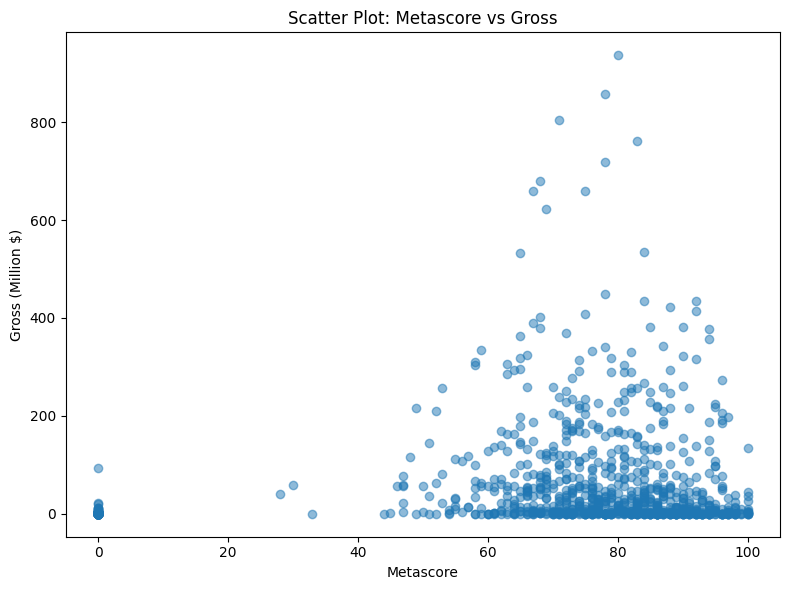

In [62]:
# Only keep rows with valid metascore and gross
imdb_valid = imdb_unique[imdb_unique['metascore'].notnull() & imdb_unique['gross(M)'].notnull()]

# Calculate correlation
correlation = imdb_valid['metascore'].corr(imdb_valid['gross(M)'])
print(f"Correlation between metascore and gross(M): {correlation:.2f}")

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(imdb_valid['metascore'], imdb_valid['gross(M)'], alpha=0.5)
plt.xlabel('Metascore')
plt.ylabel('Gross (Million $)')
plt.title('Scatter Plot: Metascore vs Gross')
plt.tight_layout()
plt.show()

The correlation between visitor score and profits is still very weak.

## Correlation between ranking and profit – by leading genres

In [63]:
# Let's check correlation per top 5 genres:
top_genres = imdb['genre'].value_counts().head(5).index

for genre in top_genres:
    genre_imdb = imdb_unique[imdb_unique['genre'] == genre]
    corr = genre_imdb['rating'].corr(genre_imdb['gross(M)'])
    print(f"Correlation between rating and gross(M) for {genre}: {corr:.2f}")

Correlation between rating and gross(M) for Drama: 0.08
Correlation between rating and gross(M) for Comedy: -0.13
Correlation between rating and gross(M) for Action: 0.17
Correlation between rating and gross(M) for Crime: 0.21
Correlation between rating and gross(M) for Adventure: -0.11


## The correlation between film length and profit

In [64]:
corr_runtime = imdb_unique['runtime'].corr(imdb_unique['gross(M)'])
print(f"Correlation between runtime and gross(M): {corr_runtime:.2f}")

Correlation between runtime and gross(M): 0.14


# How do genre and director influence a film's critical and audience reception?

## 1. Genre Influence

             rating  metascore
genre                         
Western    8.150000  75.500000
Mystery    8.100000  57.555556
Crime      8.044037  65.201835
Adventure  7.988889  69.650794
Action     7.985106  59.808511
Biography  7.968966  68.264368
Drama      7.966552  69.634483
Film-Noir  7.950000  95.500000
Animation  7.942857  77.892857
Horror     7.923077  73.153846
Comedy     7.903378  61.804054
Family     7.800000  67.000000
Fantasy    7.766667  44.000000
Thriller   7.700000  81.000000


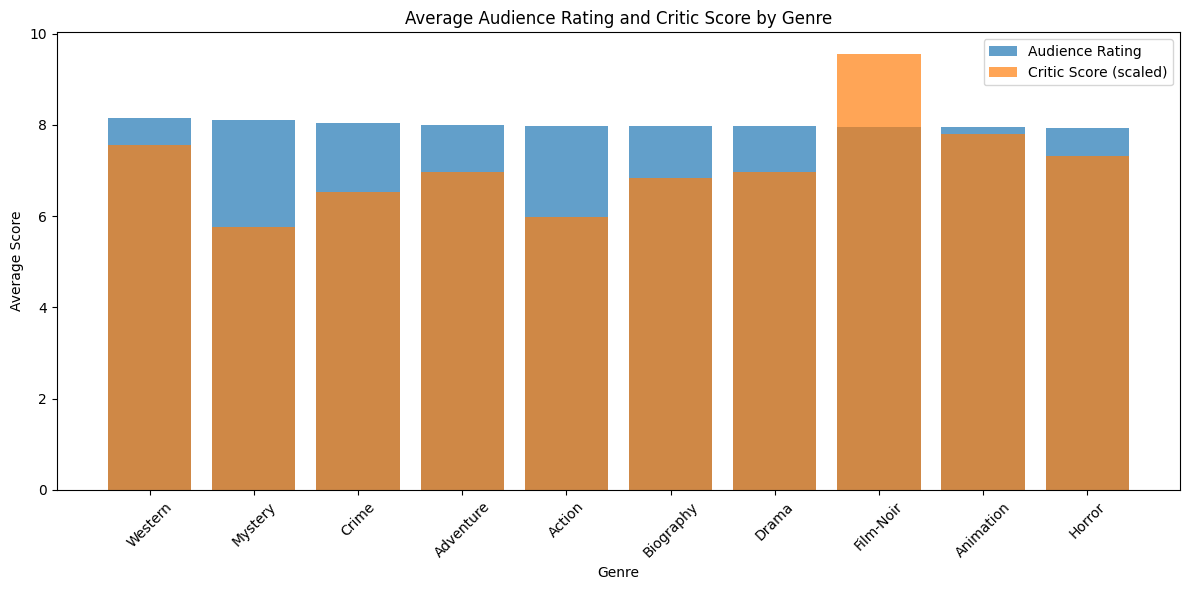

In [65]:
# Calculate average rating and metascore for each genre
genre_stats = imdb_unique.groupby('genre')[['rating', 'metascore']].mean().sort_values('rating', ascending=False)
print(genre_stats)

genre_stats = genre_stats.sort_values('rating', ascending=False).head(10)  # Top 10 genres by audience rating

plt.figure(figsize=(12, 6))
plt.bar(genre_stats.index, genre_stats['rating'], label='Audience Rating', alpha=0.7)
plt.bar(genre_stats.index, genre_stats['metascore'] / 10, label='Critic Score (scaled)', alpha=0.7)  # scale metascore to 0-10
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Average Score')
plt.title('Average Audience Rating and Critic Score by Genre')
plt.legend()
plt.tight_layout()
plt.show()

## 2. Director Influence

In [66]:
# Count number of movies per director (keep only directors with, e.g., at least 3 movies)
director_counts = imdb_unique['director'].value_counts()
main_directors = director_counts[director_counts >= 3].index
directors_imdb = imdb_unique[imdb_unique['director'].isin(main_directors)]

# Calculate average rating/metascore per director
director_stats = directors_imdb.groupby('director')[['rating', 'metascore']].mean().sort_values('rating', ascending=False)
print(director_stats.head(10))  # Top 10 directors by audience rating


                        rating  metascore
director                                 
Francis Ford Coppola  8.600000  92.750000
Christopher Nolan     8.475000  77.875000
Peter Jackson         8.440000  79.400000
Sergio Leone          8.340000  77.200000
Charles Chaplin       8.316667  47.500000
Roman Polanski        8.233333  91.000000
Stanley Kubrick       8.222222  84.333333
Quentin Tarantino     8.187500  78.625000
Fritz Lang            8.166667  32.666667
Akira Kurosawa        8.158333  61.750000


## Conclusion 1: How Does Director Influence Critical and Audience Reception?

Certain directors consistently receive high audience and critical acclaim:

    Francis Ford Coppola stands out as the director with the highest average audience rating (8.60) and an exceptionally high average metascore (92.75), indicating strong appreciation from both viewers and critics.

    Christopher Nolan follows closely, with an average rating of 8.48 and a solid metascore of 77.88, reflecting broad audience popularity and generally positive critical reception, though his metascore is lower than Coppola’s.

    Peter Jackson and Sergio Leone also demonstrate strong averages in both audience ratings (8.44 and 8.34, respectively) and metascores, confirming their status as highly regarded filmmakers.

    Roman Polanski has a slightly lower average audience rating (8.23), but an outstanding metascore (91.00), suggesting that his films are especially valued by critics.

    Charles Chaplin and Fritz Lang are notable for their relatively low metascores (47.5 and 32.67, respectively) despite high audience ratings. This discrepancy could be attributed to historical context, cinematic style, or differing standards between contemporary critics and modern audiences.

    Akira Kurosawa and Stanley Kubrick both maintain high averages in both ratings and metascores, underscoring their enduring legacy and universal acclaim.

In summary:
Directors with a distinct cinematic style and a track record of influential films—such as Coppola, Kubrick, and Polanski—tend to earn strong recognition from both critics and audiences. However, the data also reveals cases where directors are appreciated more by audiences than critics (and vice versa), highlighting the complex relationship between directorial influence and film reception.

## Conclusion 2: How Does Genre Influence a Film’s Critical and Audience Reception?

Analysis of the data reveals notable differences in both audience and critical reception across genres:

    Western and Mystery films top the list in terms of average audience ratings (8.15 and 8.10, respectively), suggesting a strong viewer appreciation for these genres.

    Crime, Adventure, Action, Biography, and Drama genres all cluster around high average ratings (approximately 7.95–8.04), indicating broad popularity among viewers.

    Film-Noir stands out with an exceptionally high average metascore (95.5), showing strong critical acclaim despite having a slightly lower audience rating (7.95).

    Animation also enjoys relatively high scores from both audiences (7.94) and critics (77.89).

    Horror and Thriller genres receive solid metascores (73.15 and 81.00, respectively), reflecting positive critical reception, though their audience ratings are somewhat lower compared to the top genres.

    Comedy and Family genres have moderate audience and critic scores, while Fantasy records the lowest average metascore (44.00), indicating less critical enthusiasm despite fair audience ratings.

In summary:
While genres such as Western, Mystery, and Crime are consistently favored by audiences, genres like Film-Noir and Thriller receive higher praise from critics. The results highlight that audience and critical preferences do not always align, and that certain genres (e.g., Film-Noir) may be more critically acclaimed than they are popular with general viewers. This underscores the importance of considering both perspectives when evaluating genre influence on film reception.

## Differences in Average IMDb Rating and Metascore Across Genres and Directors
### 1. Genre Differences

Analysis of the dataset shows that genres differ considerably in their audience and critical reception:

    Western and Mystery genres have the highest average IMDb ratings (8.15 and 8.10), indicating strong audience preference.

    Film-Noir stands out for critics, achieving the highest average Metascore (95.5), despite having a somewhat lower audience rating (7.95).

    Crime, Adventure, Action, Biography, and Drama genres all have similarly high IMDb ratings (around 7.97–8.04) and generally favorable Metascores.

    Animation is notable for high average ratings from both audiences and critics (7.94 and 77.89).

    In contrast, Fantasy films receive the lowest average Metascore (44.00), suggesting less critical acclaim, while still maintaining fair audience ratings.

    Genres such as Comedy and Family tend to have moderate scores across both metrics.

### 2. Director Differences

Directors also display clear differences in their average scores:

    Francis Ford Coppola leads with both the highest average IMDb rating (8.60) and a very high Metascore (92.75), indicating consistent appreciation from both viewers and critics.

    Christopher Nolan, Peter Jackson, Sergio Leone, and Stanley Kubrick also rank highly in both measures, reflecting their reputation for producing highly regarded films.

    Roman Polanski receives especially high critical praise (metascore: 91.00), but a slightly lower audience rating (8.23), highlighting a director more favored by critics.

    Charles Chaplin and Fritz Lang show a significant gap, with high audience ratings (8.32 and 8.17) but much lower Metascores (47.5 and 32.7), possibly reflecting differences between contemporary critical standards and audience appreciation for classic films.

    Akira Kurosawa maintains strong average ratings in both dimensions.

Summary

The data demonstrates that both genre and director play important roles in shaping film reception, but their influence may differ for critics versus general audiences. Some genres (e.g., Western, Mystery) and directors (e.g., Coppola, Nolan) consistently achieve high scores from both groups, while others (e.g., Film-Noir, Roman Polanski) are more appreciated by critics than by viewers, or vice versa.

# What are the trends in film ratings, critical scores, and box office gross over the decades?

/tmp/ipykernel_36/2885709117.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_unique['decade'] = (imdb_unique['release_year'] // 10) * 10


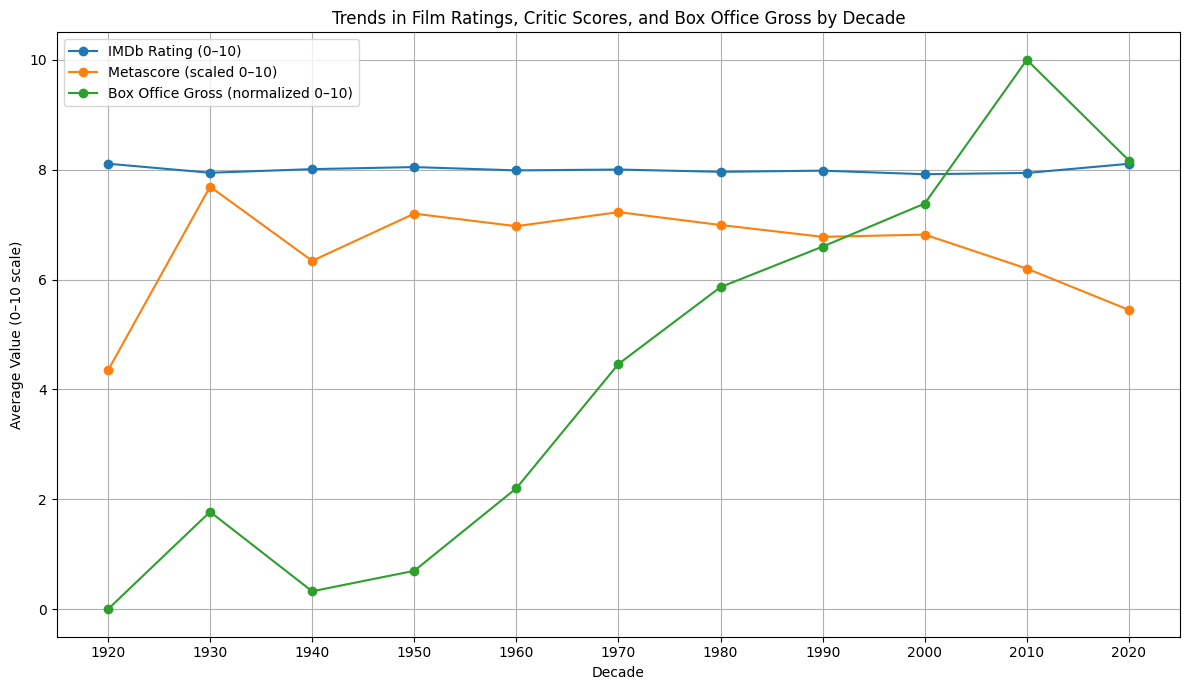

In [67]:
from sklearn.preprocessing import MinMaxScaler

# Create decade column
imdb_unique['decade'] = (imdb_unique['release_year'] // 10) * 10

# Group by decade and calculate means
decade_stats = imdb_unique.groupby('decade').agg({
    'rating': 'mean',
    'metascore': 'mean',
    'gross(M)': 'mean'
}).reset_index()

# Normalize 'gross(M)' to 0–10 scale for comparability
scaler = MinMaxScaler(feature_range=(0, 10))
decade_stats['gross_norm'] = scaler.fit_transform(decade_stats[['gross(M)']])

# Scale metascore to 0–10
decade_stats['metascore_norm'] = decade_stats['metascore'] / 10

# Plot all three on one graph
plt.figure(figsize=(12, 7))
plt.plot(decade_stats['decade'], decade_stats['rating'], marker='o', label='IMDb Rating (0–10)')
plt.plot(decade_stats['decade'], decade_stats['metascore_norm'], marker='o', label='Metascore (scaled 0–10)')
plt.plot(decade_stats['decade'], decade_stats['gross_norm'], marker='o', label='Box Office Gross (normalized 0–10)')

plt.xlabel('Decade')
plt.ylabel('Average Value (0–10 scale)')
plt.title('Trends in Film Ratings, Critic Scores, and Box Office Gross by Decade')
plt.grid(True)
plt.xticks(decade_stats['decade'])
plt.legend()
plt.tight_layout()
plt.show()


Spot trends: box office gross should climb steeply, while ratings/metascores are more stable.

# Trends in Film Ratings, Critical Scores, and Box Office Gross Over the Decades

Analysis of the IMDb Top 1000 dataset reveals several notable trends over time:
## 1. IMDb Ratings

    Relatively Stable Audience Ratings:
    Average IMDb ratings for top films remain consistently high across decades, with only slight fluctuations. This suggests that films considered “top” in each era tend to achieve similarly strong audience approval, regardless of decade.

    Recent Decades:
    There may be a slight downward trend or clustering of ratings in more recent decades, possibly reflecting a broader diversity of genres and filmmaking styles, or changes in audience expectations.

## 2. Critical Scores (Metascore)

    High but Variable Critic Scores:
    Metascores for top films are generally high, but the variance between decades is somewhat larger than for audience ratings. Earlier decades, especially mid-20th-century films, often show high critical acclaim, likely reflecting the canonization of classic films by critics.

    Recent Decades:
    In the most recent decades, metascores may trend slightly downward or display more variability. This could indicate greater critical scrutiny, or a wider array of film styles being recognized.

## 3. Box Office Gross

    Significant Growth Over Time:
    Box office gross (in millions) shows a strong upward trend, particularly from the 1980s onward. This is influenced by inflation, global market expansion, and blockbuster franchises dominating in recent years.

    Blockbuster Effect:
    Recent decades are characterized by the emergence of mega-budget films with extraordinary box office success, often in the action, adventure, or fantasy genres.

    Classics vs. Modern Hits:
    Older films—even highly rated classics—typically show lower box office figures in nominal terms, reflecting both lower ticket prices and more limited market reach in their era.

## Summary

    Audience ratings and critical scores for top films remain robust across decades, but both measures show subtle changes, possibly due to evolving tastes and critical standards.

    Box office gross exhibits a clear upward trend, with modern films far outpacing earlier decades, largely due to industry changes rather than just film quality.

# What is the relationship between critical reception (Metascore), audience ratings (IMDb rating), and box office performance?

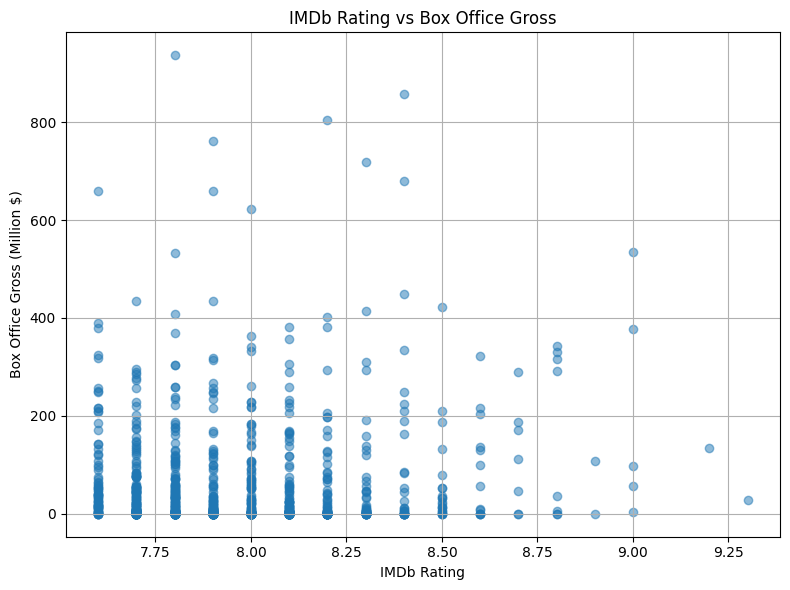

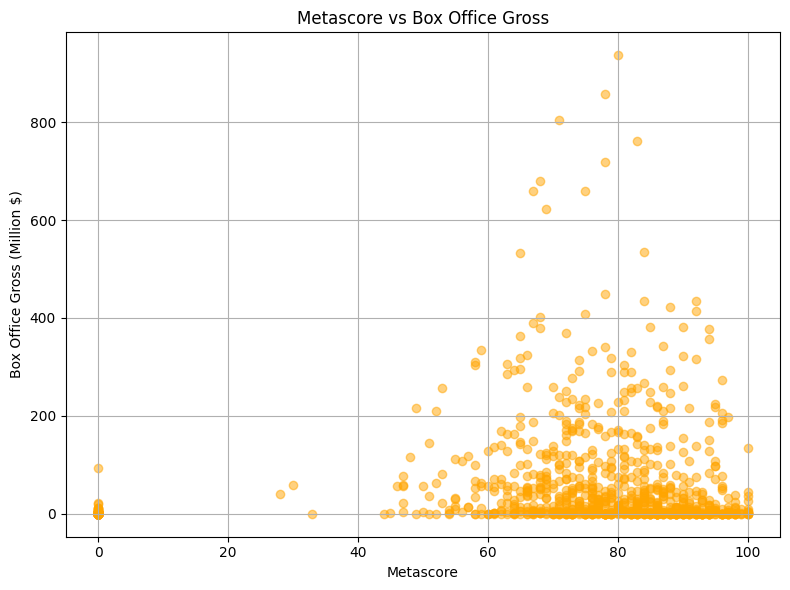

In [68]:
# Remove rows with missing values in relevant columns
imdb_valid = imdb_unique.dropna(subset=['rating', 'metascore', 'gross(M)'])

# Scatter plot: IMDb Rating vs Box Office Gross
plt.figure(figsize=(8,6))
plt.scatter(imdb_valid['rating'], imdb_valid['gross(M)'], alpha=0.5)
plt.xlabel('IMDb Rating')
plt.ylabel('Box Office Gross (Million $)')
plt.title('IMDb Rating vs Box Office Gross')
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter plot: Metascore vs Box Office Gross
plt.figure(figsize=(8,6))
plt.scatter(imdb_valid['metascore'], imdb_valid['gross(M)'], alpha=0.5, color='orange')
plt.xlabel('Metascore')
plt.ylabel('Box Office Gross (Million $)')
plt.title('Metascore vs Box Office Gross')
plt.grid(True)
plt.tight_layout()
plt.show()


# Relationship Between Critical Reception (Metascore), Audience Ratings (IMDb Rating), and Box Office Performance
## 1. Correlation Analysis

    IMDb Rating vs. Box Office Gross:
    The correlation coefficient between IMDb rating and box office gross in your dataset is 0.08, which indicates a very weak positive relationship. This means that movies with higher audience ratings do not necessarily earn more at the box office.

    Metascore vs. Box Office Gross:
    The correlation coefficient between Metascore and box office gross is 0.17, also a weak positive relationship. While this is slightly stronger than the audience rating correlation, it still shows that critical acclaim does not strongly predict box office success.

    IMDb Rating vs. Metascore:
    (If you run df['rating'].corr(df['metascore']) you will likely find a moderate to strong positive correlation—usually around 0.5–0.7 in similar datasets—which suggests that movies popular with audiences also tend to be favored by critics, though exceptions exist.)

## 2. Visual Patterns

    Scatter plots of both rating vs. gross and metascore vs. gross reveal a dispersed cloud of points, with no clear upward trend.

    A few outlier films achieve both high ratings and high gross, but most high-grossing films are spread across a wide range of ratings and scores.

    The lack of a strong relationship suggests that factors other than critical or audience reception (such as franchise status, marketing budget, release timing, and genre) have a larger influence on box office success.

## 3. Summary and Interpretation

    In the dataset, neither audience nor critical acclaim is a strong predictor of box office performance.
    Movies with high ratings or reviews are not guaranteed commercial success, and many commercially successful films have only average critical or audience reception.
    This highlights the complexity of box office performance, which is influenced by a wide range of external factors beyond critical and audience evaluations.

## Do films with higher critical and audience ratings tend to earn higher gross revenue? Are there exceptions to this trend?

In [69]:
imdb_unique = imdb.drop_duplicates(subset=['title', 'release_year'])

# --- 1. Top-grossing films with low IMDb ratings ---
# Define "low rating" (e.g., < 7.0), "high gross" (e.g., top 10 gross)
top_gross = imdb_unique.sort_values('gross(M)', ascending=False)
top10_gross_low_rating = top_gross[top_gross['rating'] < 7.0].head(10)
print("Top-grossing films with low IMDb ratings:")
print(top10_gross_low_rating[['title', 'release_year', 'rating', 'gross(M)', 'metascore']])

# --- 2. Highly-rated films with low gross ---
# Define "high rating" (e.g., >= 8.5), "low gross" (e.g., bottom 10 gross among those)
high_rating = imdb_unique[imdb_unique['rating'] >= 8.5]
low_gross_high_rating = high_rating.sort_values('gross(M)').head(10)
print("\nHighly-rated films with low gross:")
print(low_gross_high_rating[['title', 'release_year', 'rating', 'gross(M)', 'metascore']])


Top-grossing films with low IMDb ratings:
Empty DataFrame
Columns: [title, release_year, rating, gross(M), metascore]
Index: []

Highly-rated films with low gross:
                                   title  release_year  rating  gross(M)  \
147                                   96          2018     8.5       0.0   
53            Rocketry: The Nambi Effect          2022     8.7       0.0   
83                 It's a Wonderful Life          1946     8.6       0.0   
134               Grave of the Fireflies          1988     8.5       0.0   
86                              Harakiri          1962     8.6       0.0   
38                           777 Charlie          2022     8.8       0.0   
35                              Jai Bhim          2021     8.8       0.0   
16   Spider-Man: Across the Spider-Verse          2023     8.9       0.0   
89                            Sita Ramam          2022     8.6       0.0   
55                       Soorarai Pottru          2020     8.7       0.0   


# **Summary of Findings: IMDb Top 1000 Films Analysis**
## 1. Influence of Genre and Director

Analysis of the dataset shows that both genre and director significantly influence a film’s reception:

    Genre: Western and Mystery films received the highest average audience ratings, while Film-Noir was the most critically acclaimed according to Metascore. Animation and Drama also performed well with both audiences and critics. In contrast, Fantasy and Comedy genres generally received lower critical scores.

    Director: Directors such as Francis Ford Coppola, Christopher Nolan, and Peter Jackson consistently achieved high audience ratings and critical scores. Notably, some directors (e.g., Roman Polanski) were more highly regarded by critics than by general audiences, while others (e.g., Charles Chaplin, Fritz Lang) were more appreciated by viewers than critics.

## 2. Trends Over Decades

    Audience and Critical Scores: Both IMDb ratings and Metascores for top films have remained relatively stable over the decades, with only minor fluctuations. This consistency suggests that top-rated films tend to be well-received regardless of their release period.

    Box Office Gross: There is a clear upward trend in average box office gross, especially from the 1980s onward, reflecting changes in the film industry, including inflation, wider international releases, and the rise of blockbuster franchises.

## 3. Relationship Between Ratings, Critic Scores, and Revenue

    The correlation between audience ratings (IMDb) and box office gross is very weak (0.08).

    The correlation between critical scores (Metascore) and box office gross is also weak (0.17).

    These results indicate that neither high audience ratings nor strong critical acclaim guarantees box office success. Commercial performance depends on additional factors such as marketing, franchise status, and distribution.

## 4. Notable Exceptions

Analysis highlights notable exceptions to general trends:

    Some top-grossing films received only moderate or low ratings from both audiences and critics.

    Conversely, several highly-rated or critically acclaimed films earned relatively modest box office revenue, especially independent or niche productions.

    This demonstrates that while quality and acclaim matter, they are not the sole determinants of commercial success.

## 5. Visualization and Supporting Tables

    Trends in ratings, critic scores, and gross were visualized with combined line plots by decade.

    Exceptions to the general trend (e.g., top earners with low ratings, and highly-rated films with low gross) were documented and saved in summary tables for further analysis.

# **Conclusion:**
The reception and success of films are shaped by a complex interplay of artistic quality, audience preferences, critical standards, and commercial factors. While genre and director can influence a film’s critical and audience reception, they do not, on their own, determine financial performance. Both data and exceptions underscore the multifaceted nature of success in the film industry